In [1]:
#######################
# standard code block #
#######################

# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

# uses custom metis style sheet for notebooks
from IPython.core.display import HTML
HTML("""<link rel="stylesheet" href="https://soph.info/metis/nb.css" type="text/css"/>""")


import pickle
import re
import string
import nltk
import pandas as pd
import spacy
import re
import string
from gensim import matutils, models
import scipy.sparse
from collections import Counter
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# spacy.prefer_gpu()
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm

from matplotlib import pyplot as plt
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open('/home/nick/Documents/pol_wsb_wrldnews_dnkmems.pickle', 'rb') as file:
    broad = pickle.load(file)

In [3]:
stop_list = ['of', 'it', 'to', 'for', 'you', 'the', 'that', 'if', 'my', 'and', 'in', 'from','going', 'too', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaa', 'aaaaaaaa', 'aaa', 'aaaaaaaaahhhhhhhhhhhh', 'aaaaaaaand', 'aaaaaaaauuuuuugggghhh', 'aaaaaaafternoon', 'aaaaaaand', 'aaaaaand', 'aaaaall', 'aaaaalllllll', 'aaaaand', 'is', 'are', 'what', 'they', 'we', 'about', 'me', 'have', 'im', 'this', 'yeah','will','can','get','be', 'have','be', 'but', 'he', 'she', 'her', 'was', 'with', 'they']

In [4]:
first_half = askreddit[:50000]
some = askreddit[:1000]
other = askreddit[50500:51500]
final = askreddit[-1000:-1]
final_more = askreddit[80000:80700]
ot = some + other + final + final_more

NameError: name 'askreddit' is not defined

In [5]:
vec = TfidfVectorizer(stop_words=stop_list)
matrix = vec.fit_transform(broad)
idf_df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
idf_df



,aa,aaaaaaaaaaaaaaaaaaaaaa,aaaaaaahhhhhh,aaaand,aaaandonto,aaaannnndddd,aaaassrrrrgghhhh,aaand,aah,aal,...,𝘀𝘂𝗯𝗷𝗲𝗰𝘁,𝘀𝘂𝗺𝗺𝗲𝗿,𝘁𝗵𝗮𝘁,𝘁𝗵𝗲,𝘁𝗵𝗶𝘀,𝘁𝗼,𝘁𝗼𝗼𝗸,𝘂𝘀𝗲𝗱,𝘄𝗮𝘀,𝘆𝗲𝗮𝗿𝘀
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
pca = PCA(n_components=25)
pca.fit(idf_df)
pcafeatures_train = pca.transform(idf_df)

In [17]:
from sklearn.cluster import KMeans

number_of_clusters=3
km = KMeans(n_clusters=number_of_clusters, n_jobs=-1)

km.fit(idf_df)
# km.fit(pcafeatures_train)
# km.fit(digits_proj)


/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [7]:
idf_df

,aa,aaaaaaaaaaaaaaaaaaaaaa,aaaaaaahhhhhh,aaaand,aaaandonto,aaaannnndddd,aaaassrrrrgghhhh,aaand,aah,aal,...,𝘀𝘂𝗯𝗷𝗲𝗰𝘁,𝘀𝘂𝗺𝗺𝗲𝗿,𝘁𝗵𝗮𝘁,𝘁𝗵𝗲,𝘁𝗵𝗶𝘀,𝘁𝗼,𝘁𝗼𝗼𝗸,𝘂𝘀𝗲𝗱,𝘄𝗮𝘀,𝘆𝗲𝗮𝗿𝘀
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
clusters = []
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    clusters.append("Cluster {}: {}".format(i, ' '.join(top_ten_words)))
clusters

Top terms per cluster:


['Cluster 0: go like buy trump fuck',
 'Cluster 1: yes ah not fuck sir',
 'Cluster 2: not people know like vote']

In [ ]:
labs = km.labels_
len(km.labels_)

In [ ]:
# idf_df.to_pickle("science_idf_df_with_clusters.pickle")

In [19]:
y = km.labels_

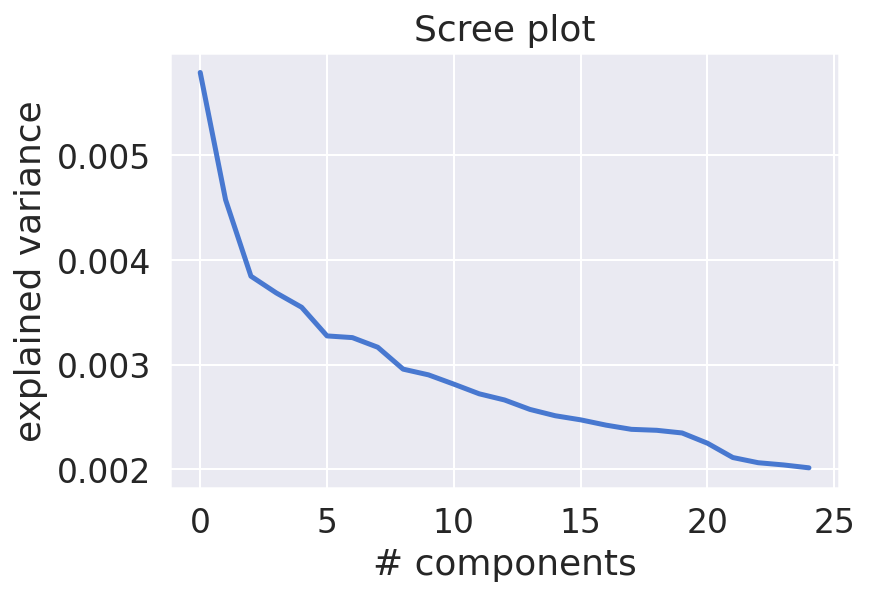

In [20]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot');

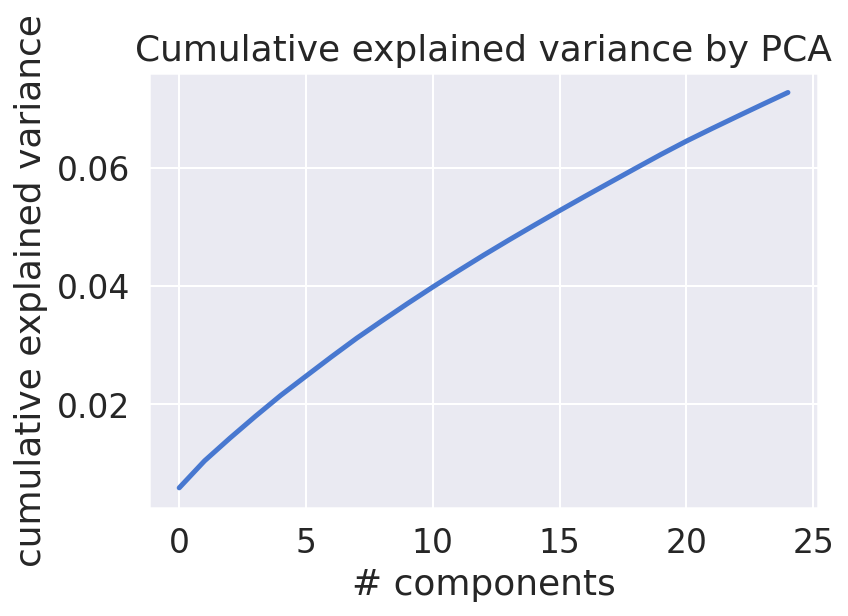

In [21]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative explained variance by PCA');

In [22]:
inert = km.inertia_

In [23]:
# Create a plot of the PCA results
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle(['r','g','b','c','m','y','orange','w','aqua','yellow'])
    target_ids = range(len(target_names))
    plt.figure(figsize=(10,10))
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label, edgecolors='gray')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

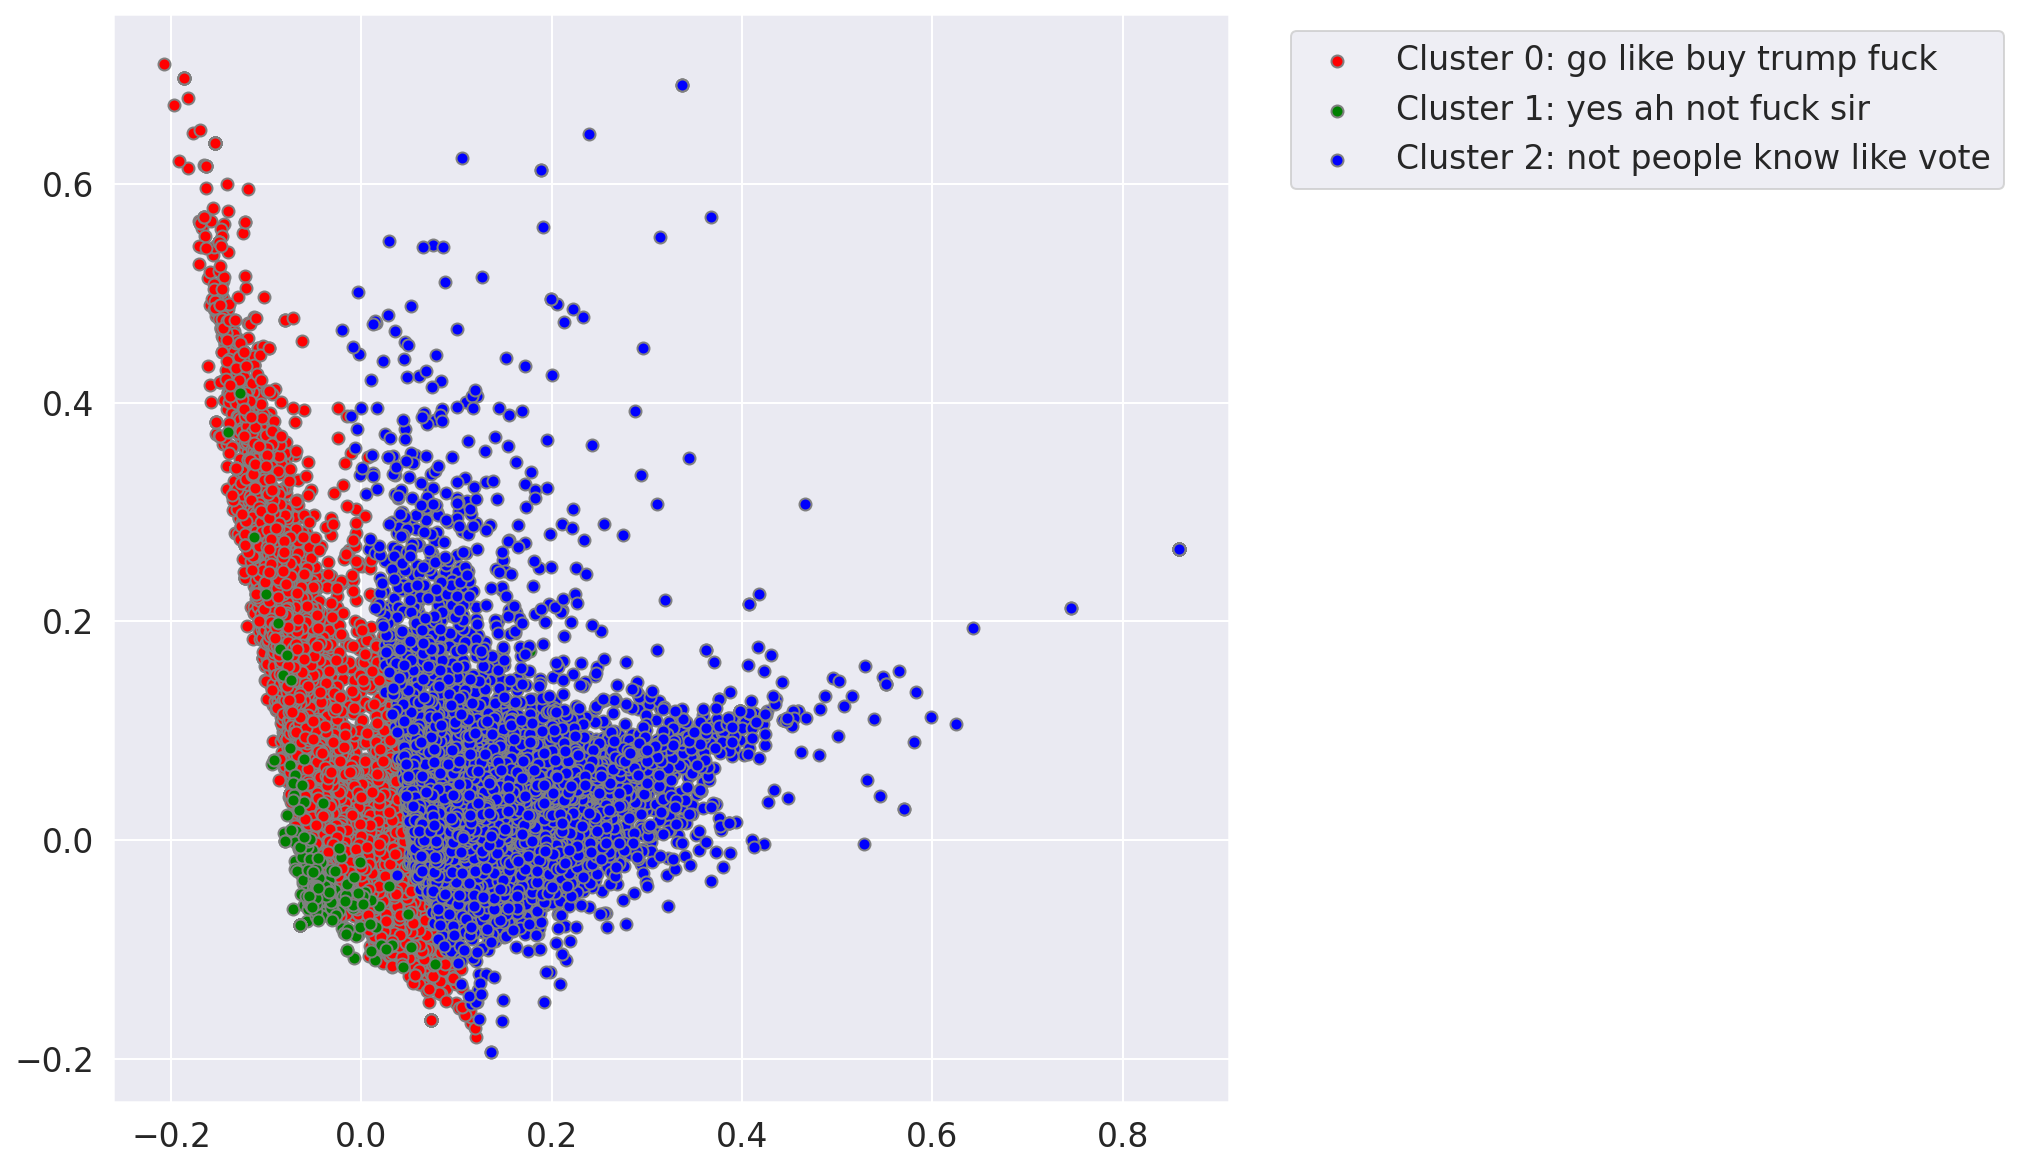

In [24]:
# plot of all the numbers
plot_PCA_2D(pcafeatures_train, target=y, target_names=clusters)

In [6]:
import umap.umap_ as umap
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [7]:
reducer = umap.UMAP()

In [8]:
embedding = reducer.fit_transform(idf_df)
embedding.shape

In [9]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)

NameError: name 'embedding' is not defined

In [ ]:
reducer = umap.UMAP(random_state=42)
reducer.fit(idf_df)

In [ ]:
UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [ ]:
embedding = reducer.transform(idf_df)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [15]:
# sklearn implements t-SNE.
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)


# Import seaborn and matplotlib.patheffects to make nice plots.
import seaborn as sns
import matplotlib.patheffects as PathEffects
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

# Random state.
RS = 20200807
# # We first reorder the data points according to the handwritten numbers.
# X = np.vstack([digits.data[digits.target==i]
#                for i in range(10)])
# y = np.hstack([digits.target[digits.target==i]
#                for i in range(10)])
digits_proj = TSNE(random_state=RS).fit_transform(pcafeatures_train)

/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.manifold.t_sne module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.manifold. Anything that cannot be imported from sklearn.manifold is now part of the private API.
  warnings.warn(message, FutureWarning)


IndexError: index 13 is out of bounds for axis 0 with size 10

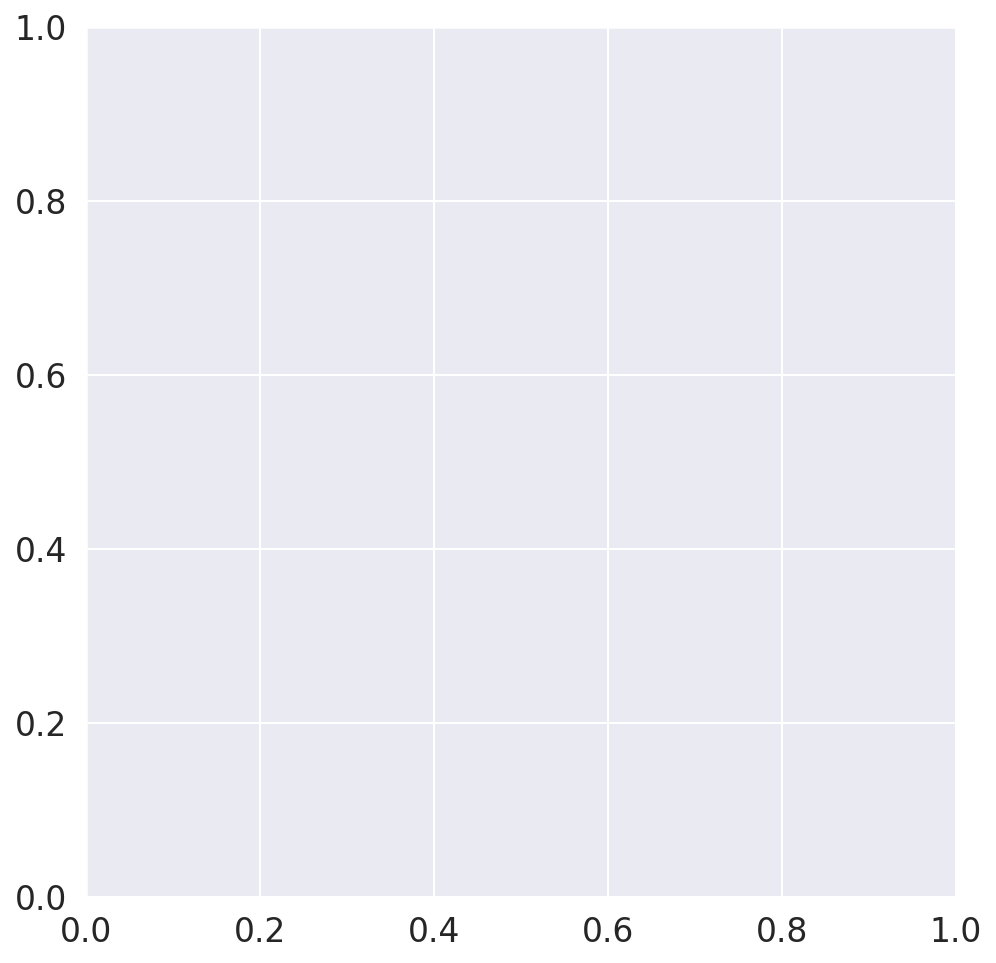

In [16]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts
scatter(digits_proj, y)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot


labels = km.labels_
centroids = km.cluster_centers_

for i in range(20):
    # select only data observations with cluster label == i
    ds = idf_df[np.where(labels==i)]
    # plot the data observations
    pyplot.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()

result = zip(X , kmeans.labels_)

sortedR = sorted(result, key=lambda x: x[1])
sortedR

In [ ]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(wsb_dtm)


In [ ]:
y_kmeans = kmeans.predict(wsb_dtm)

In [ ]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [ ]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
display_cluster(wsb_dtm)

In [ ]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(data_dtmn)
display_cluster(data_dtmn,km,num_clusters)

In [ ]:
num_clusters = 7
km = KMeans(n_clusters=num_clusters)
km.fit(data_dtmn.transpose())
display_cluster(data_dtmn.transpose(),km,num_clusters)